<a href="https://colab.research.google.com/github/qazalmehrban/Medical-Segmentation/blob/ghazal/kaiser_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Normalized frequency [cycles per sample]')

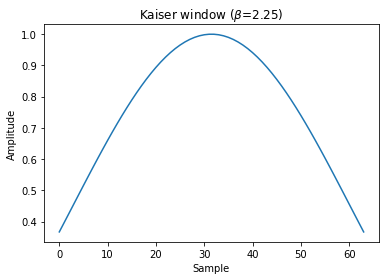

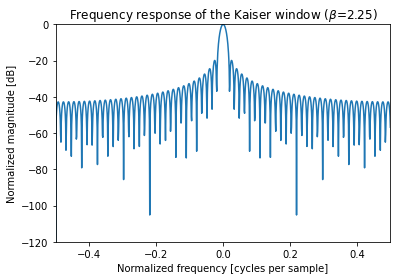

In [ ]:
window = signal.kaiser(64, beta=2.25)
plt.plot(window)
plt.title(r"Kaiser window ($\beta$=2.25)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 1000) / (len(window)/2.0)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / seabs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

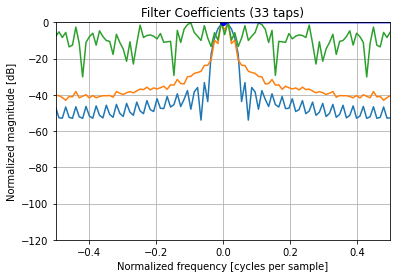

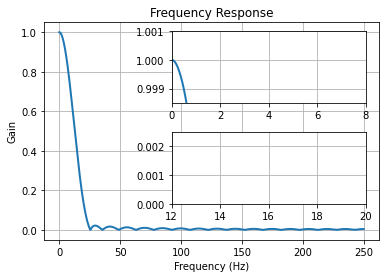

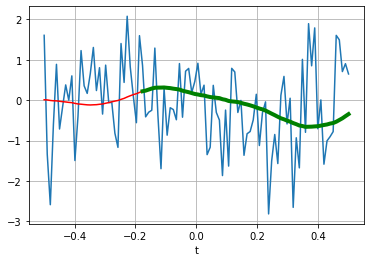

33
2.782893370471638


In [ ]:
from scipy.fftpack import fft, fftshift
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show
import scipy.signal as sg
import numpy as np
import matplotlib.pyplot as plt
#------------------------------------------------
# Create a signal for demonstration.
#------------------------------------------------

num_samples = 100
t = np.linspace(-0.5, 0.5, num_samples)
mean = 0
std = 1 
x = np.random.normal(mean, std, size=num_samples)

#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = 500 / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 30.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 35.0

# Compute the order and Kaiser parameter for the FIR filter.
N, beta = kaiserord(ripple_db, width)

# The cutoff frequency of the filter.
cutoff_hz = 10.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps,1, x)

b = fft(x , num_samples) / (len(x)/2)
n = fft(taps , num_samples) / (len(taps)/2)
A = fft(filtered_x, num_samples) / (len(filtered_x)/2.0)
s_f = b - beta*(b- n*(b / abs(b)))
s = fft(s_f, num_samples) / (len(s_f)/2.0)

response  = 20 * np.log10(np.abs(fftshift(n / abs(n).max())))
response1 = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
response2 = 20 * np.log10(np.abs(fftshift(b / abs(b).max())))

plt.plot(t, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.plot(t, response1)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")
plt.plot(t, response2)
plt.axis([-0.5, 0.5, -120, 0])
plt.title(r"Frequency response of the Kaiser window ($\beta$=2.25)")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Upper inset plot.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Lower inset plot
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / num_samples

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:], filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()
print(N)
print(beta)


[-0.0, 20.750636811976033, 20.79619990683768, 20.797648467671195, 20.847259746032787, 21.193061208436106, 21.255089182534356, 21.29105336843786, 21.299367081491567, 21.75929436732426, 21.80230393856839, 21.926159672882566, 21.9583859461161, 22.240227156161517, 22.25556152709887, 22.304084674723423, 22.336933151189097, 22.725195784206072, 22.770468076754405, 22.776045906407596, 22.802595570869826, 22.954633501080824, 22.96620586259821, 22.99800581027712, 23.011015812270838, 23.19042239640261, 23.205745394067332, 23.21341028596386, 23.24676125992149, 23.294892672946062, 23.367419859496728, 23.595035765813076, 23.65420335206318, 23.675331235543755, 23.69262971784854, 23.701589715156125, 23.704824316801073, 23.711942566317575, 23.71343742183516, 23.721479151613536, 23.72356812542911, 23.724410445394426, 23.726052291471653, 23.733521892379517, 23.763997437730666, 23.769446607683, 23.818684559072103, 23.83381217937698, 23.86135571993581, 23.974598694918228, 24.03279421717749, 24.062305118534

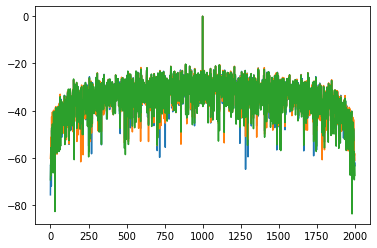

In [ ]:
sig_noise = b + n
corr =  20 * np.log10(np.abs(signal.correlate(sig_noise, b) / abs(signal.correlate(sig_noise, b).max())))
corr1 =  20 * np.log10(np.abs(signal.correlate(b + A, b) / abs(signal.correlate(b + A, b).max())))
corr2 =  20 * np.log10(np.abs(signal.correlate(b + s, b) / abs(signal.correlate(b + s, b).max())))


print(sorted(-1*corr))
plt.plot(corr)
plt.plot(corr1)
plt.plot(corr2)